In [1]:
import numpy as np
import pandas as pd

In [2]:
train_file_path_numerical = 'data/numerical_data_train.csv'
train_file_path_categorical = 'data/categorical_dataset_housing_training.csv'
test_file_path_numerical = 'data/numerical_data_test.csv'
test_file_path_categorical = 'data/categorical_dataset_housing_testing.csv'

In [3]:
dataset_numerical_train = pd.read_csv(train_file_path_numerical)
dataset_categorical_train = pd.read_csv(train_file_path_categorical)
dataset_numerical_test = pd.read_csv(test_file_path_numerical)
dataset_categorical_test = pd.read_csv(test_file_path_categorical)

In [4]:
print(dataset_numerical_train.shape)
print(dataset_categorical_train.shape)
print(dataset_numerical_test.shape)
print(dataset_categorical_test.shape)

(1455, 9)
(1460, 29)
(1459, 8)
(1459, 28)


In [5]:
print(dataset_numerical_train.columns)
print(dataset_categorical_train.columns)
print(dataset_numerical_test.columns)
print(dataset_categorical_test.columns)

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageArea',
       u'TotalBsmtSF', u'FullBath', u'Fireplaces', u'Age', u'Id'],
      dtype='object')
Index([u'Neighborhood', u'MSSubClass', u'Exterior1st', u'Exterior2nd',
       u'SaleType', u'MSZoning', u'SalePrice', u'Id', u'ExterQual_Fa',
       u'ExterQual_Gd', u'ExterQual_TA', u'KitchenQual_Fa', u'KitchenQual_Gd',
       u'KitchenQual_TA', u'Foundation_CBlock', u'Foundation_PConc',
       u'Foundation_Slab', u'Foundation_Stone', u'Foundation_Wood',
       u'HeatingQC_Fa', u'HeatingQC_Gd', u'HeatingQC_Po', u'HeatingQC_TA',
       u'SaleCondition_AdjLand', u'SaleCondition_Alloca',
       u'SaleCondition_Family', u'SaleCondition_Normal',
       u'SaleCondition_Partial', u'KitchenQual_MISSING'],
      dtype='object')
Index([u'OverallQual', u'GrLivArea', u'GarageArea', u'TotalBsmtSF',
       u'FullBath', u'Fireplaces', u'Age', u'Id'],
      dtype='object')
Index([u'Neighborhood', u'MSSubClass', u'Exterior1st', u'Exterior2nd',
     

In [6]:
dataset_train = pd.merge(dataset_numerical_train,dataset_categorical_train,on = 'Id')
dataset_test = pd.merge(dataset_numerical_test,dataset_categorical_test,on = 'Id')

In [7]:
print(dataset_train.columns)
print(dataset_test.columns)

Index([u'SalePrice_x', u'OverallQual', u'GrLivArea', u'GarageArea',
       u'TotalBsmtSF', u'FullBath', u'Fireplaces', u'Age', u'Id',
       u'Neighborhood', u'MSSubClass', u'Exterior1st', u'Exterior2nd',
       u'SaleType', u'MSZoning', u'SalePrice_y', u'ExterQual_Fa',
       u'ExterQual_Gd', u'ExterQual_TA', u'KitchenQual_Fa', u'KitchenQual_Gd',
       u'KitchenQual_TA', u'Foundation_CBlock', u'Foundation_PConc',
       u'Foundation_Slab', u'Foundation_Stone', u'Foundation_Wood',
       u'HeatingQC_Fa', u'HeatingQC_Gd', u'HeatingQC_Po', u'HeatingQC_TA',
       u'SaleCondition_AdjLand', u'SaleCondition_Alloca',
       u'SaleCondition_Family', u'SaleCondition_Normal',
       u'SaleCondition_Partial', u'KitchenQual_MISSING'],
      dtype='object')
Index([u'OverallQual', u'GrLivArea', u'GarageArea', u'TotalBsmtSF',
       u'FullBath', u'Fireplaces', u'Age', u'Id', u'Neighborhood',
       u'MSSubClass', u'Exterior1st', u'Exterior2nd', u'SaleType', u'MSZoning',
       u'ExterQual_Fa', u'Ex

In [8]:
dataset_train = dataset_train.drop(['SalePrice_x'], axis = 1)

In [9]:
print(dataset_train.shape)
print(dataset_test.shape)

(1455, 36)
(1459, 35)


In [10]:
total = dataset_test.isnull().sum().sort_values(ascending=False)
percent = (dataset_test.isnull().sum()/dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
missing_data

,Total,Percent
SaleCondition_Partial,0,0.0
Neighborhood,0,0.0
ExterQual_Fa,0,0.0
MSZoning,0,0.0
SaleType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0
MSSubClass,0,0.0
Id,0,0.0
ExterQual_TA,0,0.0


In [12]:
print(dataset_train.shape)
print(dataset_test.shape)

(1455, 36)
(1459, 35)


In [13]:
l = dataset_test['Id']

In [14]:
l.shape


(1459,)

In [15]:
y = dataset_train['SalePrice_y'].values
dataset_train = dataset_train.drop(['SalePrice_y'], axis = 1)
dataset_train = dataset_train.drop(['Id'], axis = 1)
dataset_test = dataset_test.drop(['Id'], axis = 1)
X = dataset_train.values
X_test_original = dataset_test.values

In [16]:
print(dataset_train.shape)
print(dataset_test.shape)

(1455, 34)
(1459, 34)


In [17]:
X_train = X
y_train = y
X_test = X_test_original

In [18]:
y_train = np.reshape(np.array([y_train]),(-1,1))
print(y_train.shape)

(1455, 1)


In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1455, 34)
(1455, 1)
(1459, 34)


In [20]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_final = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test_final = sc_x.transform(X_test)

/Users/mayansh4/anaconda2/envs/MLAZ/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train.shape)

(1455, 34)
(1459, 34)
(1455, 1)


In [39]:
from sklearn.svm import SVR
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model.fit(X_train_final, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

(1459,)


ValueError: x and y must be the same size

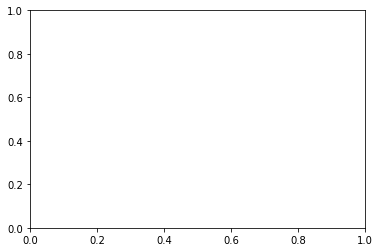

In [92]:
# from sklearn.svm import SVR
# import matplotlib.pyplot as plt
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
# X = X_train_final
# y = y_train
# y_rbf = svr_rbf.fit(X_train_final, y_train).predict(X_test_final)
# print(y_rbf.shape)
# y_rbf = np.reshape(np.array([y_rbf]),(-1,1))
# # y_lin = svr_lin.fit(X, y).predict(X)
# # y_poly = svr_poly.fit(X, y).predict(X)

# # #############################################################################
# # Look at the results
# lw = 2
# plt.scatter(X_train_final, y_train, color='darkorange', label='data')
# plt.plot(X_test_final, y_rbf, color='navy', lw=lw, label='RBF model')
# # plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
# # plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
# plt.xlabel('data')
# plt.ylabel('target')
# plt.title('Support Vector Regression')
# plt.legend()
# plt.show()

In [29]:
# Make predictions using the testing set
y_pred = model.predict(X_test_final)

In [30]:
y_pred

array([-0.66247358, -0.73148931, -0.33480435, ...,  0.04694933,
       -0.40373386,  0.05122235])

In [30]:
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score

# regr = linear_model.LinearRegression()

# regr.fit(X_train_final, y_train)

# # Make predictions using the testing set
# y_pred = regr.predict(X_test_final)

In [31]:
y_pred

array([-0.66247358, -0.73148931, -0.33480435, ...,  0.04694933,
       -0.40373386,  0.05122235])

In [32]:
y_pred = np.reshape(np.array([y_pred]),(-1,1))
y_pred.shape

(1459, 1)

In [33]:
y_pred_converted = sc_y.inverse_transform(y_pred)

In [34]:
y_pred_converted.shape

(1459, 1)

In [35]:
result = pd.DataFrame()
result['Id'] = l
result['SalePrice'] = y_pred_converted
print(result.shape)


(1459, 2)


In [36]:
new_cols = ['Id', 'SalePrice']
result.to_csv('submission_01.csv', columns=new_cols, index=False)

In [ ]:
'''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_final = sc.fit_transform(X_train)
X_test_final = sc.transform(X_test)

sample_weight = np.random.RandomState(42).rand(y_train.shape[0])

print("Training......")
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=322, random_state=0, bootstrap=True, max_depth=32,
max_features='sqrt',
min_samples_leaf=1,
min_samples_split=2,
n_jobs=-1)
# classifier.fit(X_train_final, y_train)
clf_isotonic = CalibratedClassifierCV(classifier, method='isotonic')
clf_isotonic.fit(X_train_final, y_train, sample_weight)

print("Predicting....")
# y_prob = classifier.predict_proba(X_test_final)
y_prob = clf_isotonic.predict_proba(X_test_final)

print("Converting to CSV....")
innovation_challenge_key = dataset_scoring.innovation_challenge_key
innovation_challenge_key = list(innovation_challenge_key)
final_prob = list(y_prob[:, 1])
final_list = list(zip(innovation_challenge_key, final_prob))
new_cols = ['INNOVATION_CHALLENGE_KEY', 'RENEWAL_PROBABLIITY']
df = pd.DataFrame(final_list, columns=new_cols)
df = df.sort_values('INNOVATION_CHALLENGE_KEY')
df.to_csv('submission_120418_322_retuned_calib_only_major_training.csv', columns=new_cols, index=False)
'''